In [1]:
import pandas as pd  # 文字数を節約
%matplotlib inline 

In [2]:
!ls

MTA_NYCT_Subway_Elevator_and_Escalator_Availability__Beginning_2015_20240627.csv
Untitled.ipynb


In [3]:
df = pd.read_csv("MTA_NYCT_Subway_Elevator_and_Escalator_Availability__Beginning_2015_20240627.csv", # csvファイルのパス
                 #sep="\t", # tabをseparator
                 #encoding="iso8859-1", # encode
                #na_values=[0],
                parse_dates=['Month']
                ) # None 

# 全部表示させる
pd.options.display.max_colwidth = None
pd.set_option('display.max_columns', None)
                
df.head()


,Month,Borough,Equipment Type,Equipment Code,Total Outages,Scheduled Outages,Unscheduled Outages,Entrapments,Time Since Major Improvement,AM Peak Availability,AM Peak Hours Available,AM Peak Total Hours,PM Peak Availability,PM Peak Hours Available,PM Peak Total Hours,24-Hour Availability,24-Hour Hours Available,24-Hour Total Hours,Station Name,Station MRN,Station Complex Name,Station Complex MRN
0,2015-01-01,Queens,Elevator,EL426,2,2,0,0,95.0,1.000000,124.000000,124.0,1.000000,124.000000,124.0,0.986022,733.600000,744.0,JUNCTIONBLVD-FLS-7,451,Junction Blvd - Station,451
1,2015-01-01,Queens,Elevator,EL411,6,5,1,0,313.0,0.984677,122.100000,124.0,0.981586,121.716667,124.0,0.962522,716.116667,744.0,SUTPHINBLVD-ARCHERAV-JFKAIRPORT-QBL-E/J/Z,279,Sutphin Blvd-Archer Av-JFK Airport - Station,279
2,2015-01-01,Brooklyn,Escalator,ES332,16,3,13,0,143.0,0.958199,118.816667,124.0,0.903360,112.016667,124.0,0.932684,693.916667,744.0,MYRTLE-WYCKOFFAVS-MYT-M,112,"Myrtle-Wyckoff Avs (L,M)",630
3,2015-01-01,Queens,Elevator,EL449X,0,0,0,0,NaN,1.000000,124.000000,124.0,1.000000,124.000000,124.0,1.000000,744.000000,744.0,SUTPHINBLVD-ARCHERAV-JFKAIRPORT-QBL-E/J/Z,279,Sutphin Blvd-Archer Av-JFK Airport - Station,279
4,2015-01-01,Manhattan,Escalator,ES239,7,3,4,0,189.0,0.978898,121.383333,124.0,0.973790,120.750000,124.0,0.964315,717.450000,744.0,5AV/53ST-QBL-E/M,276,5 Av/53 St - Station,276


In [4]:
print(df.nunique(dropna=False))# これが初期の呪文としてよろしいかと

df.info()

Month                             113
Borough                             4
Equipment Type                      2
Equipment Code                    652
Total Outages                      69
Scheduled Outages                  36
Unscheduled Outages                61
Entrapments                        10
Time Since Major Improvement      723
AM Peak Availability             6178
AM Peak Hours Available          4778
AM Peak Total Hours               442
PM Peak Availability             6463
PM Peak Hours Available          5039
PM Peak Total Hours               390
24-Hour Availability            18165
24-Hour Hours Available         12064
24-Hour Total Hours              1586
Station Name                      166
Station MRN                       166
Station Complex Name              125
Station Complex MRN               136
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64880 entries, 0 to 64879
Data columns (total 22 columns):
 #   Column                        Non-Nul

<Axes: xlabel='Month'>

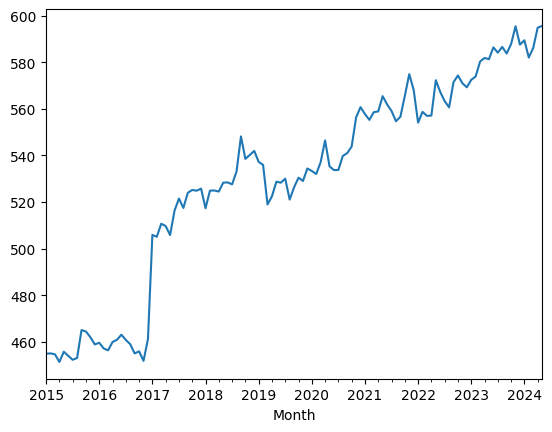

In [5]:
df.groupby('Month')['24-Hour Availability'].sum().plot()
# availability elevators and escalators

<Axes: xlabel='Month'>

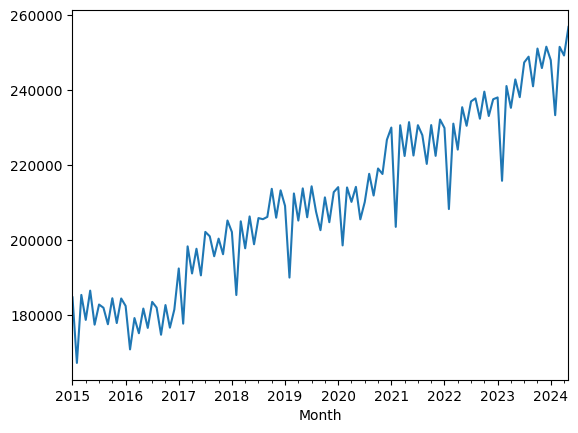

In [6]:
df[df['Equipment Type'] == "Elevator"].groupby('Month')['24-Hour Hours Available'].sum().plot()

In [7]:
df[df['Equipment Type'] == "Elevator"].value_counts('Equipment Code')

Equipment Code
EL103    113
EL343    113
EL372    113
EL371    113
EL370    113
        ... 
EL780      2
EL781      2
EL778      2
EL776      2
EL777      2
Name: count, Length: 370, dtype: int64

<Axes: xlabel='Month'>

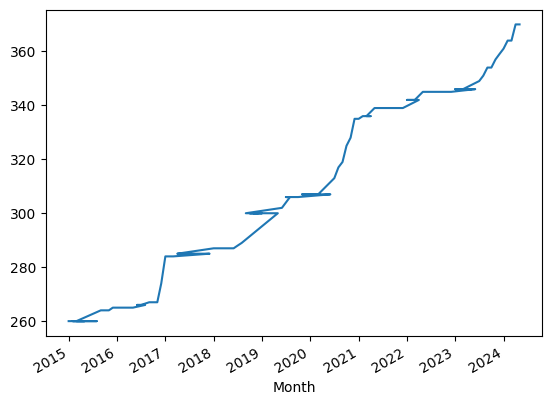

In [8]:
df[df['Equipment Type'] == "Elevator"].value_counts('Month').plot()

In [9]:
elevator_df = df[df['Equipment Type'] == "Elevator"]

In [10]:
# Step 2: Group by 'Borough' and 'Month', then count the occurrences
grouped_data = elevator_df.groupby(['Borough', 'Month']).size().unstack('Borough')
grouped_data

Borough,Bronx,Brooklyn,Manhattan,Queens
Month,,,,
2015-01-01,32,55,130,43
2015-02-01,32,55,130,43
2015-03-01,32,55,130,43
2015-04-01,32,55,130,43
2015-05-01,32,55,130,43
...,...,...,...,...
2024-01-01,42,84,181,54
2024-02-01,45,84,181,54
2024-03-01,45,84,181,54


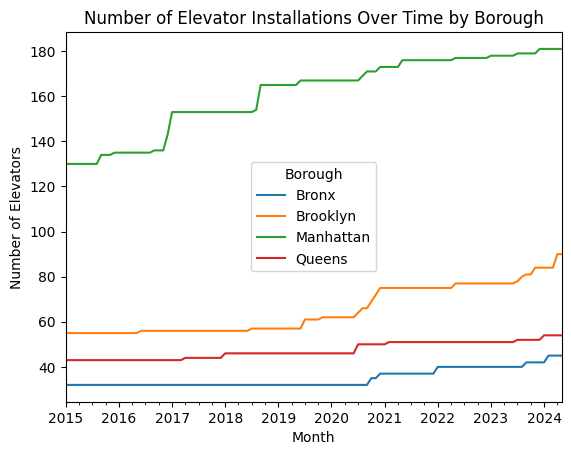

In [11]:
import matplotlib.pyplot as plt

grouped_data.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Number of Elevators')
plt.title('Number of Elevator Installations Over Time by Borough')
plt.legend(title='Borough')
plt.show()

In [12]:
# Step 2: Group by 'Borough' and 'Month', then count the occurrences
groupeddata2 = (elevator_df
                .groupby(['Borough', 'Month'])
                ['24-Hour Availability']
                .sum().reset_index()
)

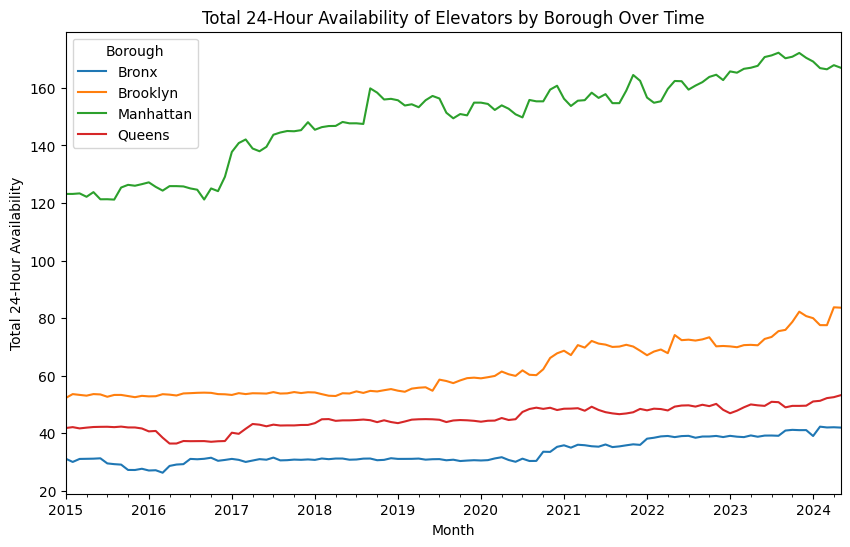

In [13]:
# ピボットテーブルを作成
pivot_data = groupeddata2.pivot_table(index='Month', columns='Borough', values='24-Hour Availability', aggfunc='sum')

# プロット
pivot_data.plot(kind='line', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Total 24-Hour Availability')
plt.title('Total 24-Hour Availability of Elevators by Borough Over Time')
plt.legend(title='Borough')
plt.show()


# たぶん、Boroughごとのエレベーター準備率が出せるな。稼働分数/全ての駅の数*24みたいな感じで。